# Names

**Attention**

This notebook depends on the following packages:
- [pandas](https://pypi.org/project/pandas/) dataframes implementation
- [plotnine](https://pypi.org/project/plotnine/) ggplot implementation

You need to install them (pandas may already be installed by default, but probably not plotnine).

The classical way to install a package in Python is with `pip`. In a shell, run:
```sh
pip install --user plotnine
```

Replace "plotnine" by the name of the desired package. Also, if the default version of Python on your system is Python 2, you may also need to replace "pip" by "pip3".

More information is available on the [official documentation](https://docs.python.org/3/installing/index.html).

## Getting the data

The data comes from the Insee website: https://www.insee.fr/fr/statistiques/2540004

In [1]:
csv_name = 'prenoms.csv'

When a line starts with the character `!`, it is executed as a bash command instead of a Python instruction. The following cell uses several bash commands to download the archive and extract it.

In [2]:
!wget https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2018_csv.zip -O archive.zip
!unzip -p archive.zip > $csv_name
!wc -l $csv_name
!head $csv_name

--2020-02-03 10:53:03--  https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2018_csv.zip
Résolution de www.insee.fr (www.insee.fr)… 194.254.37.163, 143.196.255.163
Connexion à www.insee.fr (www.insee.fr)|194.254.37.163|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 
Taille : non indiqué [application/zip]
Sauvegarde en : « archive.zip »

archive.zip             [   <=>              ]  12,44M   758KB/s    ds 14s     

2020-02-03 10:53:17 (918 KB/s) - « archive.zip » sauvegardé [13042303]

3624995 prenoms.csv
﻿sexe;preusuel;annais;dpt;nombre
1;A;XXXX;XX;27
1;AADAM;XXXX;XX;27
1;AADEL;XXXX;XX;55
1;AADIL;1983;84;3
1;AADIL;1992;92;3
1;AADIL;XXXX;XX;175
1;AAHIL;2016;95;3
1;AAHIL;XXXX;XX;17
1;AAKASH;XXXX;XX;26


In [3]:
import pandas
from plotnine import *

df = pandas.read_csv(csv_name, sep=';')
print(len(df))
df.head()

3624994


sexe preusuel annais dpt  nombre
0     1        A   XXXX  XX      27
1     1    AADAM   XXXX  XX      27
2     1    AADEL   XXXX  XX      55
3     1    AADIL   1983  84       3
4     1    AADIL   1992  92       3

Converting the `annais` and `dpt` columns to numerical values.

In [4]:
for col in ['annais', 'dpt']:
    df[col] = pandas.to_numeric(df[col], errors='coerce')

df.head()

sexe preusuel  annais   dpt  nombre
0     1        A     NaN   NaN      27
1     1    AADAM     NaN   NaN      27
2     1    AADEL     NaN   NaN      55
3     1    AADIL  1983.0  84.0       3
4     1    AADIL  1992.0  92.0       3

## A simple plot: evolution of the number of births

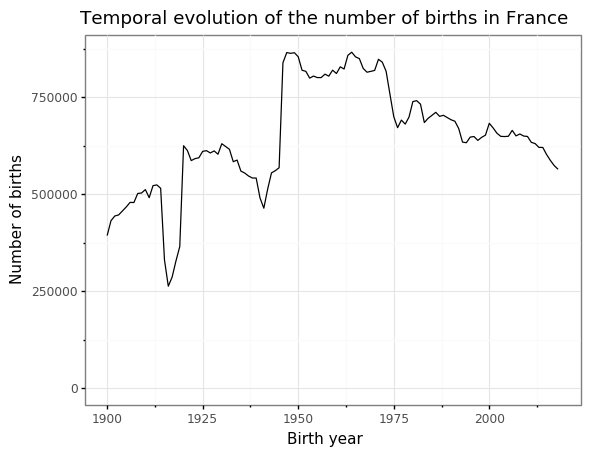

<ggplot: (-9223363294346223381)>

In [5]:
tmp = df.groupby(['annais'])[['nombre']].sum().reset_index()
plot = ggplot(tmp) + aes(x='annais', y='nombre') + geom_line() + theme_bw()
plot = plot + expand_limits(y=0)
plot = plot + xlab('Birth year') + ylab('Number of births')
plot = plot + ggtitle('Temporal evolution of the number of births in France')
plot